In [9]:
# %autosave 60
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os, sys, traceback
# os.environ["OPENBLAS_NUM_THREADS"] = "16"

from copy import deepcopy as copy
import numpy as np
from astropy.io import fits
import astropy.units as u
import astropy.constants as const
from astropy.cosmology import WMAP9 as cosmo
import matplotlib.pyplot as plt

In [2]:
sys.path.append(os.path.abspath("/lwk/xychen/AKARI_ULIRG/SEDFit/"))
from s3fit_v1 import lamb_air_to_vac, FitFrame, Calzetti00_ExtLaw

In [3]:
v0_redshift = 0.4684

ang_dist = cosmo.kpc_proper_per_arcmin(v0_redshift).to('kpc/arcsec').value
# luminosity distance conversion
lum_dist = cosmo.luminosity_distance(v0_redshift).to('cm').value
lum_area = 4*np.pi * lum_dist**2 # in cm2

lum_sun = const.L_sun.to('erg/s').value
vel_c = const.c.to('km/s').value

In [4]:
phot_name_b = np.array(['SDSS_up', 'SDSS_gp', 'SDSS_rp', 'SDSS_ip', 'SDSS_zp', '2MASS_J',
       '2MASS_H', '2MASS_Ks', 'WISE_1', 'WISE_2', 'WISE_3', 'WISE_4'])
phot_flux_b = np.array([5.5153001e-02, 8.1697002e-02, 1.6868000e-01, 2.3030201e-01,
       2.9083699e-01, 2.6506501e-01, 5.1317799e-01, 6.0935998e-01,
       6.5717798e-01, 7.9932898e-01, 1.6560427e+01, 9.2305588e+01])
phot_ferr_b = np.array([5.37700020e-04, 7.42999837e-05, 7.90003687e-05, 1.22798607e-04,
       1.38930045e-03, 4.11554985e-02, 2.27502026e-02, 1.14961006e-01,
       2.30419636e-03, 2.99510360e-03, 3.06923389e-02, 3.02008629e-01])

phot_trans_dir='../filters/'

In [5]:
intspec_all_tw = fits.open('J1126_intspec_tw.fits')[0].data
spec_wave_w = intspec_all_tw[0]
spec_flux_w = intspec_all_tw[1]
spec_ferr_w = intspec_all_tw[2]

spec_valid_range = [[4950, 5074], [5120, 5240], [5280, 6420], [6500, 10050]]
spec_R_inst = 631 / 0.31 * 0.5
spec_flux_scale = 1e-15

In [6]:
# set models
ssp_file = '/lwk/xychen/AKARI_ULIRG/GMOS/ifufit_code/ssp/popstar21_stellar_nebular_fullwave.fits'
ssp_pmmc = [[[0, -1000, 1000], [600, 100, 1200], [0.5, 0, 5.0], '5.5e-3, None, solar_met']]
# ssp pars: voff, fwhm, AV; population set
agn_pmmc = [[[0, -1000, 1000], [600, 100, 1200], [3.0, 1.5, 10.0], [-1.7, -1.7, -1.7], 'powerlaw']]
# agn pars: voff, fwhm, AV; alpha_lambda of powerlaw
el_pmmc = [[[    0, -500,  500], [ 500,250, 750], [3.0,0,5], [1.2,0.5,1.45], 'NLR:all'], 
           [[ -500,-2000,  100], [1000,750,2500], [1.5,0,5], [1.2,0.5,1.45], 'outflow_1:all'], 
           [[-2500,-3000,-2000], [1000,750,2500], [1.5,0,5], [1.2,0.5,1.45], 'outflow_2:[OIII]a,[OIII]b,[NII]a,Ha,[NII]b']]
# el pars: voff, fwhm, AV, SIIa/b (n_e: 1e4--1cm-3); 3 kinematic system
torus_disc_file = '../models/skirtor_disc_allincl_p1_nosca_q5.dat'
torus_dust_file = '../models/skirtor_torus_allincl_p1_nosca_q5.dat'
torus_pmmc = [[[0, -1000, 1000], [5, 3, 11], [30, 10, 80], [20, 10, 30], [50, 0, 90], 'dust']] #'disc+dust'
# torus pars: voff, tau, opening angle, radii ratio, inclination angle

In [7]:
FF = FitFrame(spec_wave_w=spec_wave_w, spec_flux_w=spec_flux_w, spec_ferr_w=spec_ferr_w, 
              spec_valid_range=spec_valid_range, spec_R_inst=spec_R_inst, spec_flux_scale=spec_flux_scale, 
              phot_name_b=phot_name_b, phot_flux_b=phot_flux_b, phot_ferr_b=phot_ferr_b, phot_trans_dir=phot_trans_dir,
              v0_redshift=v0_redshift, 
              ssp_pmmc=ssp_pmmc, ssp_file=ssp_file, 
              el_pmmc=el_pmmc, 
              # agn_pmmc=agn_pmmc, 
              torus_pmmc=torus_pmmc, torus_disc_file=torus_disc_file, torus_dust_file=torus_dust_file, 
              num_mock_loops=30, fitraw=True, plot=0, verbose=False)

v6, 250121: (1) S3Fit
Photometric data in bands: ['SDSS_up' 'SDSS_gp' 'SDSS_rp' 'SDSS_ip' 'SDSS_zp' '2MASS_J' '2MASS_H'
 '2MASS_Ks' 'WISE_1' 'WISE_2' 'WISE_3' 'WISE_4']
Spec models wavelength range (rest): 2972.201827240925 7484.315237939023
SED models wavelength range (rest): 1649.891797813306 239970.85955593377
SSP models normalization wavelength: 5500 +- 25
SSP models number: 73 used in 424
SSP models age range (Gyr): 0.005754399373371567 7.943282347242822
SSP models metallicity (Z/H): [0.02]
Emission line complex 0 NLR , total number: 30 , free lines: ['Ha' 'HeI' '[SII]b' '[NII]b' '[OI]a' '[NI]b' '[FeVI]' '[OIII]b'
 '[NeIII]a' '[OII]b' '[NeV]b']
Emission line complex 1 outflow_1 , total number: 30 , free lines: ['Ha' 'HeI' '[SII]b' '[NII]b' '[OI]a' '[NI]b' '[FeVI]' '[OIII]b'
 '[NeIII]a' '[OII]b' '[NeV]b']
Emission line complex 2 outflow_2 , total number: 5 , free lines: ['Ha' '[NII]b' '[OIII]b']
Valid data wavelength range: [[4950, 5074], [5120, 5240], [5280, 6420], [6500, 10050]]


In [8]:
# run fit
FF.main_fit()

#### loop 0/30 start: ####
#### fit the raw spectrum (non-mocked) ####
Continual models: ssp
Number of used SSP models: 8
fit_ntry=1, chi_sq=1.774
**** Spec Fit, init continua (cont_fit_init), 4.7 s; totally spent, 4.7 s ****
fit_ntry=1, chi_sq=1.991
**** Spec Fit, init emission lines (el_fit_init), 12.6 s; totally spent, 17.2 s ****
Number of used SSP models: 15
fit_ntry=1, chi_sq=1.922
**** Spec Fit, update continua (cont_fit_1), 14.1 s; totally spent, 31.3 s ****
fit_ntry=1, chi_sq=1.911
**** Spec Fit, update emission lines (el_fit_1), 9.5 s; totally spent, 40.8 s ****
fit_ntry=1, poor fit with chi_sq=1.932 > 1.917 (accepted); available min chi_sq=1.932
fit_ntry=2, poor fit with chi_sq=1.930 > 1.917 (accepted); available min chi_sq=1.930
fit_ntry=3, poor fit with chi_sq=1.930 > 1.917 (accepted); available min chi_sq=1.930
fit_ntry=3, chi_sq=1.930
**** Spec Fit, all models (joint_fit_1), 39.1 s; totally spent, 79.9 s ****
ssp continuum peak SN=53.24499874651858, enabled
#### continuu

fit_ntry=1, poor fit with chi_sq=2.941 > 2.920 (accepted); available min chi_sq=2.941
fit_ntry=2, poor fit with chi_sq=2.937 > 2.920 (accepted); available min chi_sq=2.937
fit_ntry=3, poor fit with chi_sq=2.946 > 2.920 (accepted); available min chi_sq=2.937
fit_ntry=3, chi_sq=2.937
**** Spec Fit, all models (joint_fit_1), 108.8 s; totally spent, 128.3 s ****
ssp continuum peak SN=53.177292324534996, enabled
#### continuum models after examination: ssp ####
NLR pean SN=48.122671406329054, enabled
outflow_1 pean SN=32.25957870874935, enabled
outflow_2 pean SN=10.10232649393212, enabled
#### emission line components after examination: ['NLR', 'outflow_1', 'outflow_2'] ####
fit_ntry=1, chi_sq=2.878
**** Spec Fit, update continua (cont_fit_2.1), 0.9 s; totally spent, 129.2 s ****
fit_ntry=1, chi_sq=3.008
Number of used SSP models: 24
Coeffs.sum of used SSP models: 1.0
Ages of dominant SSP models: [0.0060256  0.00645654 0.01698244 0.02187762 4.46683592]
**** Spec Fit, update continua (cont_f

fit_ntry=1, chi_sq=3.059
**** Spec Fit, update continua (cont_fit_2.1), 0.7 s; totally spent, 36.3 s ****
fit_ntry=1, chi_sq=3.182
Number of used SSP models: 24
Coeffs.sum of used SSP models: 0.9988599577400094
Ages of dominant SSP models: [0.0060256  0.00645654 0.02187762 0.02398833 2.51188643]
**** Spec Fit, update continua (cont_fit_2.2), 1.4 s; totally spent, 37.8 s ****
fit_ntry=1, chi_sq=3.056
**** Spec Fit, update emission lines (el_fit_2), 0.7 s; totally spent, 38.5 s ****
fit_ntry=1, chi_sq=3.114
**** Spec Fit, all models (joint_fit_2), 6.0 s; totally spent, 44.5 s ****
#### Perform Simultaneous Spec+SED Fit ####
#### continual models used in Spec+SED fit: ssp+torus
fit_ntry=1, chi_sq=0.226
**** Spec+SED Fit, update continua (cont_fit_3.1), 38.8 s; totally spent, 83.3 s ****
fit_ntry=1, chi_sq=0.242
Number of used SSP models: 24
Coeffs.sum of used SSP models: 1.0
Ages of dominant SSP models: [0.0060256  0.00645654 0.00870964 0.04365158 0.04786301]
**** Spec+SED Fit, update con

fit_ntry=1, chi_sq=0.230
**** Spec+SED Fit, update continua (cont_fit_3.1), 31.8 s; totally spent, 101.5 s ****
fit_ntry=1, chi_sq=0.246
Number of used SSP models: 24
Coeffs.sum of used SSP models: 0.9999999999999917
Ages of dominant SSP models: [0.0060256  0.00645654 0.00724436 0.00870964 0.04786301]
**** Spec+SED Fit, update continua (cont_fit_3.2), 11.4 s; totally spent, 112.8 s ****
fit_ntry=1, chi_sq=3.017
**** Spec+SED Fit, update emission lines (el_fit_3), 0.7 s; totally spent, 113.6 s ****
fit_ntry=1, chi_sq=0.211
**** Spec+SED Fit, use all models (joint_fit_3), 81.0 s; totally spent, 194.6 s ****
#### loop 9/30 end, 194.6 s ####
#### loop 10/30 start: ####
#### fit the mocked spectrum ####
Continual models: ssp
Number of used SSP models: 7
fit_ntry=1, chi_sq=2.620
**** Spec Fit, init continua (cont_fit_init), 6.2 s; totally spent, 6.2 s ****
fit_ntry=1, chi_sq=2.864
**** Spec Fit, init emission lines (el_fit_init), 1.5 s; totally spent, 7.7 s ****
Number of used SSP models: 14

fit_ntry=1, chi_sq=2.828
**** Spec Fit, init continua (cont_fit_init), 1.8 s; totally spent, 1.8 s ****
fit_ntry=1, chi_sq=3.021
**** Spec Fit, init emission lines (el_fit_init), 3.6 s; totally spent, 5.5 s ****
Number of used SSP models: 13
fit_ntry=1, chi_sq=2.836
**** Spec Fit, update continua (cont_fit_1), 13.0 s; totally spent, 18.4 s ****
fit_ntry=1, chi_sq=2.825
**** Spec Fit, update emission lines (el_fit_1), 1.3 s; totally spent, 19.8 s ****
fit_ntry=1, poor fit with chi_sq=2.841 > 2.830 (accepted); available min chi_sq=2.841
fit_ntry=2, poor fit with chi_sq=2.835 > 2.830 (accepted); available min chi_sq=2.835
fit_ntry=3, poor fit with chi_sq=2.837 > 2.830 (accepted); available min chi_sq=2.835
fit_ntry=3, chi_sq=2.835
**** Spec Fit, all models (joint_fit_1), 17.1 s; totally spent, 36.8 s ****
ssp continuum peak SN=53.260339413204264, enabled
#### continuum models after examination: ssp ####
NLR pean SN=50.14679638742054, enabled
outflow_1 pean SN=32.002234967162615, enabled
o

fit_ntry=2, poor fit with chi_sq=3.012 > 2.983 (accepted); available min chi_sq=3.012
fit_ntry=3, poor fit with chi_sq=3.012 > 2.983 (accepted); available min chi_sq=3.012
fit_ntry=3, chi_sq=3.012
**** Spec Fit, all models (joint_fit_1), 31.0 s; totally spent, 51.7 s ****
ssp continuum peak SN=53.21471144186059, enabled
#### continuum models after examination: ssp ####
NLR pean SN=47.745158182858496, enabled
outflow_1 pean SN=30.999396926405264, enabled
outflow_2 pean SN=10.229445634377539, enabled
#### emission line components after examination: ['NLR', 'outflow_1', 'outflow_2'] ####
fit_ntry=1, chi_sq=2.951
**** Spec Fit, update continua (cont_fit_2.1), 1.0 s; totally spent, 52.7 s ****
fit_ntry=1, chi_sq=3.031
Number of used SSP models: 24
Coeffs.sum of used SSP models: 0.9998552126643601
Ages of dominant SSP models: [0.0060256  0.00645654 0.01819701 0.02187762 4.46683592]
**** Spec Fit, update continua (cont_fit_2.2), 1.4 s; totally spent, 54.1 s ****
fit_ntry=1, chi_sq=2.907
**** 

fit_ntry=1, chi_sq=2.851
**** Spec Fit, update continua (cont_fit_2.1), 0.7 s; totally spent, 34.4 s ****
fit_ntry=1, chi_sq=2.955
Number of used SSP models: 24
Coeffs.sum of used SSP models: 1.0
Ages of dominant SSP models: [0.0057544  0.00645654 0.02187762 1.99526231 4.46683592]
**** Spec Fit, update continua (cont_fit_2.2), 1.4 s; totally spent, 35.8 s ****
fit_ntry=1, chi_sq=2.834
**** Spec Fit, update emission lines (el_fit_2), 0.3 s; totally spent, 36.1 s ****
fit_ntry=1, chi_sq=2.887
**** Spec Fit, all models (joint_fit_2), 3.9 s; totally spent, 40.0 s ****
#### Perform Simultaneous Spec+SED Fit ####
#### continual models used in Spec+SED fit: ssp+torus
fit_ntry=1, chi_sq=0.220
**** Spec+SED Fit, update continua (cont_fit_3.1), 35.7 s; totally spent, 75.7 s ****
fit_ntry=1, chi_sq=0.236
Number of used SSP models: 24
Coeffs.sum of used SSP models: 1.0
Ages of dominant SSP models: [0.0060256  0.00645654 0.00870964 0.00891251 0.05495409]
**** Spec+SED Fit, update continua (cont_fit

fit_ntry=1, chi_sq=0.218
**** Spec+SED Fit, update continua (cont_fit_3.1), 42.7 s; totally spent, 112.6 s ****
fit_ntry=1, chi_sq=0.236
Number of used SSP models: 24
Coeffs.sum of used SSP models: 1.0
Ages of dominant SSP models: [0.0060256  0.00645654 0.00870964 0.00891251 0.04786301]
**** Spec+SED Fit, update continua (cont_fit_3.2), 8.2 s; totally spent, 120.8 s ****
fit_ntry=1, chi_sq=3.007
**** Spec+SED Fit, update emission lines (el_fit_3), 1.0 s; totally spent, 121.8 s ****
fit_ntry=1, chi_sq=0.198
**** Spec+SED Fit, use all models (joint_fit_3), 106.6 s; totally spent, 228.4 s ****
#### loop 22/30 end, 228.4 s ####
#### loop 23/30 start: ####
#### fit the mocked spectrum ####
Continual models: ssp
Number of used SSP models: 8
fit_ntry=1, chi_sq=2.718
**** Spec Fit, init continua (cont_fit_init), 8.3 s; totally spent, 8.3 s ****
fit_ntry=1, chi_sq=2.956
**** Spec Fit, init emission lines (el_fit_init), 2.2 s; totally spent, 10.5 s ****
Number of used SSP models: 12
fit_ntry=1, 

fit_ntry=1, chi_sq=2.824
**** Spec Fit, init continua (cont_fit_init), 2.0 s; totally spent, 2.0 s ****
fit_ntry=1, chi_sq=3.031
**** Spec Fit, init emission lines (el_fit_init), 3.9 s; totally spent, 5.9 s ****
Number of used SSP models: 16
fit_ntry=1, chi_sq=2.893
**** Spec Fit, update continua (cont_fit_1), 10.0 s; totally spent, 15.9 s ****
fit_ntry=1, chi_sq=2.906
**** Spec Fit, update emission lines (el_fit_1), 3.3 s; totally spent, 19.2 s ****
fit_ntry=1, poor fit with chi_sq=2.941 > 2.900 (accepted); available min chi_sq=2.941
fit_ntry=2, poor fit with chi_sq=2.939 > 2.900 (accepted); available min chi_sq=2.939
fit_ntry=3, poor fit with chi_sq=2.940 > 2.900 (accepted); available min chi_sq=2.939
fit_ntry=3, chi_sq=2.939
**** Spec Fit, all models (joint_fit_1), 43.2 s; totally spent, 62.4 s ****
ssp continuum peak SN=53.13556662438413, enabled
#### continuum models after examination: ssp ####
NLR pean SN=47.84821803825661, enabled
outflow_1 pean SN=30.82560963709637, enabled
out

fit_ntry=3, poor fit with chi_sq=2.884 > 2.844 (accepted); available min chi_sq=2.884
fit_ntry=3, chi_sq=2.884
**** Spec Fit, all models (joint_fit_1), 27.0 s; totally spent, 38.5 s ****
ssp continuum peak SN=53.15014475638309, enabled
#### continuum models after examination: ssp ####
NLR pean SN=48.38958618221343, enabled
outflow_1 pean SN=29.754081961880747, enabled
outflow_2 pean SN=11.617435506839088, enabled
#### emission line components after examination: ['NLR', 'outflow_1', 'outflow_2'] ####
fit_ntry=1, chi_sq=2.826
**** Spec Fit, update continua (cont_fit_2.1), 1.0 s; totally spent, 39.5 s ****
fit_ntry=1, chi_sq=2.938
Number of used SSP models: 24
Coeffs.sum of used SSP models: 1.0
Ages of dominant SSP models: [0.0060256  0.00645654 0.01698244 0.02187762 1.99526231]
**** Spec Fit, update continua (cont_fit_2.2), 2.4 s; totally spent, 41.9 s ****
fit_ntry=1, chi_sq=2.821
**** Spec Fit, update emission lines (el_fit_2), 0.4 s; totally spent, 42.3 s ****
fit_ntry=1, chi_sq=2.872

# Output best-fit parameters

In [10]:
FF.output_ssp_to_screen()


Best-fit single stellar populations
-----------------------------------------------------------
|  ID  |   Age   |  Met   | Coeff  | Coeff.rms | log(M/L) |
-----------------------------------------------------------
| 0236 |  0.0060 | 0.0200 | 0.1911 |    0.0705 |   2.3737 |
| 0237 |  0.0065 | 0.0200 | 0.2078 |    0.0838 |   2.3576 |
| 0238 |  0.0071 | 0.0200 | 0.0097 |    0.0301 |   2.3097 |
| 0239 |  0.0072 | 0.0200 | 0.1234 |    0.0957 |   2.3122 |
| 0240 |  0.0076 | 0.0200 | 0.0022 |    0.0107 |   2.3268 |
| 0245 |  0.0087 | 0.0200 | 0.1284 |    0.0774 |   2.4812 |
| 0246 |  0.0089 | 0.0200 | 0.1231 |    0.0869 |   2.5491 |
| 0266 |  0.0324 | 0.0200 | 0.0002 |    0.0009 |   2.9303 |
| 0267 |  0.0339 | 0.0200 | 0.0006 |    0.0023 |   2.9330 |
| 0268 |  0.0363 | 0.0200 | 0.0020 |    0.0070 |   2.9367 |
| 0269 |  0.0380 | 0.0200 | 0.0017 |    0.0055 |   2.9443 |
| 0270 |  0.0398 | 0.0200 | 0.0009 |    0.0050 |   2.9473 |
| 0271 |  0.0417 | 0.0200 | 0.0006 |    0.0024 |   2.9534 |
| 0

In [11]:
# results in the array, FF.output_ssp_lp
# _lp denotes the results are stored in format of [i_loop, i_par], 
# where i_loop and i_par denote the index of each mock loop and each parameters
# parameters: (0) chi_sq (1) ssp_voff (km/s) (2) ssp_fwhm (km/s) (3) ssp_AV 
# (4) redshift (5) flux5500 (spec_flux_scale * erg/s/cm2/AA) (6) mass (Msun) to lum5500 (Lsun/AA) ratio
# (7) log lum-weight age (Gyr) (8) log mass-weight age (Gyr)
# (9) log lum-weight metallicity (Z/H) (10) log mass-weight metallicity (Z/H)
# (11--434) flux (spec_flux_scale * erg/s/cm2/AA) of ssp models

# example
print('Best-fit redshift from stellar continuum:', FF.output_ssp_lp[:,4].mean(), '+-', FF.output_ssp_lp[:,4].std())

Best-fit redshift from stellar continuum: 0.4684372992553085 +- 8.617189417717401e-05


In [12]:
FF.output_el_to_screen()


Best-fit emission line components
-------------------------------------------------------------------------------------
|   Par/Line Name    |       Kin_0        |       Kin_1        |       Kin_2        |
-------------------------------------------------------------------------------------
|       Chi^2        |     0.19 +-   0.01 |     0.00 +-   0.00 |     0.00 +-   0.00 |
|        Voff        | -  25.12 +-   4.51 | -1017.01 +-  37.64 | -2474.73 +- 223.40 |
|        FWHM        |   563.37 +-  17.16 |  1489.79 +-  51.71 |  2013.21 +- 263.24 |
|         AV         |     2.90 +-   0.19 |     1.60 +-   0.66 |     2.56 +-   1.24 |
|      [SII]a/b      |     1.06 +-   0.06 |     1.41 +-   0.09 |     1.00 +-   0.24 |
|     Ha 6564.63     |     5.34 +-   0.43 |     3.10 +-   0.40 |     0.12 +-   0.25 |
|     Hb 4862.69     |     0.81 +-   0.04 |     0.68 +-   0.06 |     0.00 +-   0.00 |
|     Hg 4341.69     |     0.27 +-   0.01 |     0.26 +-   0.04 |     0.00 +-   0.00 |
|     Hd 4102.90   

In [14]:
# results in the array, FF.output_el_lcp
# _lp denotes the results are stored in format of [i_loop, i_comp, i_par], 
# where i_loop, i_comp and i_par denote the index of each mock loop, each component, and each parameters
# components: NLR, outflow_1, outflow_2 (in this test case)
# parameters: (0) chi_sq (1) voff (km/s) (2) fwhm (km/s) (3) AV (from Balmer decrement) (4) [SII]6716/6731 ratio
# (5--) flux (spec_flux_scale * erg/s/cm2) of each line

# for example
print('Best-fit narrow line velocity shift:', FF.output_el_lcp[:,0,1].mean(), '+-', FF.output_el_lcp[:,0,1].std())

line_name = '[OIII]b'
i_line = np.where(FF.el_mod.line_name_n == line_name)[0][0]+5
print('Best-fit [OIII]5007 outflow_1 flux:', FF.output_el_lcp[:,1,i_line].mean(), '+-', FF.output_el_lcp[:,1,i_line].std())

Best-fit narrow line velocity shift: -25.12136514929531 +- 4.439104380229422
Best-fit [OIII]5007 outflow_1 flux: 7.941020514800753 +- 0.4314476649422529


In [15]:
FF.output_torus_to_screen()


Best-fit Torus components
| Voff = -25.1217 +/- 4.5150
| Tau =    10.99 +/- 0.0224
| OpenAngel = 74.2800 +/- 7.1144
| RadRatio = 25.9412 +/- 0.9184
| Inclination = 89.8512 +/- 0.3580



# Output best-fit spectra

Text(0, 0.5, 'Flux (1e-15 $erg/s/cm2/\\AA$)')

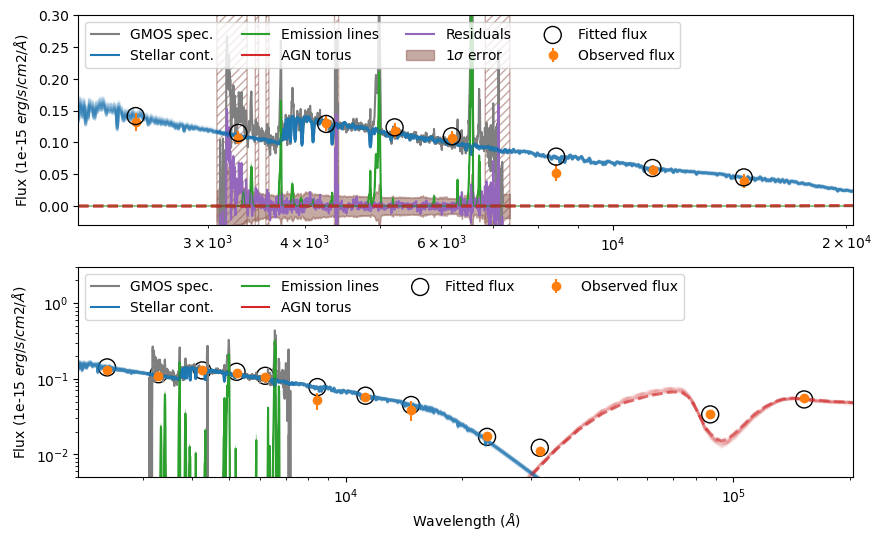

In [16]:
tmp_z = (1+v0_redshift)
sed_wave_w = FF.sed['wave_w']

plt.figure(figsize=(10,6))
ax = plt.subplot(2, 1, 1)
plt.plot(FF.spec['wave_w']/tmp_z, FF.spec['flux_w'] , c='C7', label='GMOS spec.')
plt.plot(FF.spec['wave_w']/tmp_z, FF.spec['fmod_ssp_w'], c='C0', label='Stellar cont.')
plt.plot(FF.spec['wave_w']/tmp_z, FF.spec['fmod_el_w'], c='C2', label='Emission lines')
plt.plot(FF.spec['wave_w']/tmp_z, FF.spec['fmod_torus_w'], c='C3', label='AGN torus')
plt.plot(FF.spec['wave_w']/tmp_z, FF.spec['fres_w'], c='C4', alpha=1, label='Residuals')
plt.fill_between(FF.spec['wave_w']/tmp_z, -1*(FF.spec['ferr_w']+0.1*FF.spec['flux_w']), 1*(FF.spec['ferr_w']+0.1*FF.spec['flux_w']), 
                 fc='C5', ec='C5', alpha=0.5, label='1$\sigma$ error')
plt.fill_between(FF.spec['wave_w']/tmp_z, -1*~FF.spec['mask_valid_w'], 1*~FF.spec['mask_valid_w'], 
                 hatch='////', fc='None', ec='C5', alpha=0.5)

for i in range(FF.num_mock_loops):
    plt.plot(FF.sed['wave_w']/tmp_z, FF.output_sed_ltw[i,0,:], '-', c='C0', linewidth=2, alpha=np.minimum(1,1/(FF.num_mock_loops/2)))
    plt.plot(FF.sed['wave_w']/tmp_z, FF.output_sed_ltw[i,1,:], '-', c='C2', linewidth=.5, alpha=np.minimum(1,1/(FF.num_mock_loops/2)))
    plt.plot(FF.sed['wave_w']/tmp_z, FF.output_sed_ltw[i,2,:], '--', c='C3', linewidth=2, alpha=np.minimum(1,1/(FF.num_mock_loops/2)))

plt.errorbar(FF.phot['wave_b']/tmp_z, FF.phot['flux_b'], (FF.phot['ferr_b']+0.1*FF.phot['flux_b'])*1, fmt='o', color='C1', label='Observed flux' )
plt.scatter(FF.phot['wave_b']/tmp_z, FF.phot['fmod_b'], marker='o', color='None', ec='k', s=150, label='Fitted flux', zorder=20 )

plt.legend(ncol=4, loc=2)
plt.ylim(-0.03,0.3)
plt.xlim(3e3/tmp_z,3e4/tmp_z) 
plt.xscale('log')
plt.ylabel('Flux ('+str(spec_flux_scale)+' $erg/s/cm2/\AA$)')

ax = plt.subplot(2, 1, 2)
plt.plot(FF.spec['wave_w']/tmp_z, FF.spec['flux_w'] , c='C7', label='GMOS spec.')
plt.plot(FF.spec['wave_w']/tmp_z, FF.spec['fmod_ssp_w'], c='C0', label='Stellar cont.')
plt.plot(FF.spec['wave_w']/tmp_z, FF.spec['fmod_el_w'], c='C2', label='Emission lines')
plt.plot(FF.spec['wave_w']/tmp_z, FF.spec['fmod_torus_w'], c='C3', label='AGN torus')

for i in range(FF.num_mock_loops):
    plt.plot(FF.sed['wave_w']/tmp_z, FF.output_sed_ltw[i,0,:], '-', c='C0', linewidth=2, alpha=np.minimum(1,1/(FF.num_mock_loops/2)))
    plt.plot(FF.sed['wave_w']/tmp_z, FF.output_sed_ltw[i,1,:], '-', c='C2', linewidth=.5, alpha=np.minimum(1,1/(FF.num_mock_loops/2)))
    plt.plot(FF.sed['wave_w']/tmp_z, FF.output_sed_ltw[i,2,:], '--', c='C3', linewidth=2, alpha=np.minimum(1,1/(FF.num_mock_loops/2)))

plt.errorbar(FF.phot['wave_b']/tmp_z, FF.phot['flux_b'], 
            (FF.phot['ferr_b']+0.1*FF.phot['flux_b'])*1, fmt='o', color='C1', label='Observed flux' )
plt.scatter(FF.phot['wave_b']/tmp_z, FF.phot['fmod_b'], marker='o', color='None', ec='k', s=150, label='Fitted flux')

plt.legend(ncol=4, loc=2)
plt.ylim(0.005,3)
plt.xlim(3e3/tmp_z,3e5/tmp_z) 
plt.yscale('log'); plt.xscale('log')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Flux ('+str(spec_flux_scale)+' $erg/s/cm2/\AA$)')

Text(0, 0.5, 'Flux (mJy))')

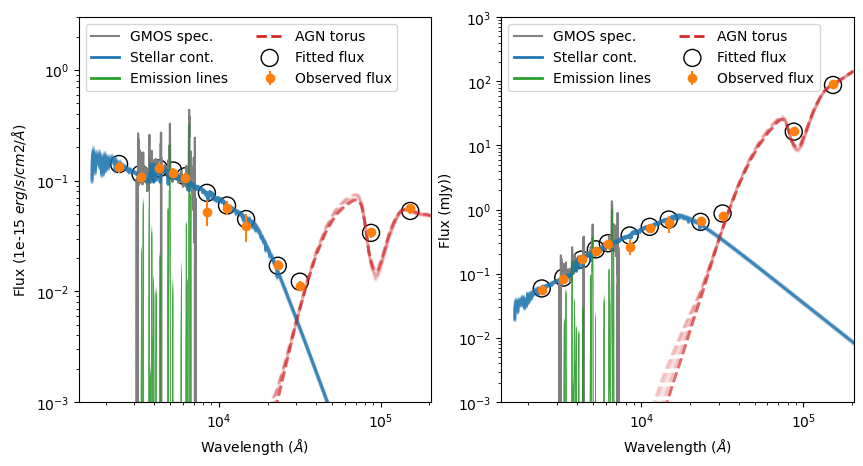

In [17]:
plt.figure(figsize=(10,5))

ax = plt.subplot(1, 2, 1)
tmp_w = 1
plt.plot(FF.spec['wave_w']/tmp_z, FF.spec['flux_w'] * tmp_w , c='C7', label='GMOS spec.')

tmp_w = 1
for i in range(FF.num_mock_loops):
    plt.plot(FF.sed['wave_w']/tmp_z, FF.output_sed_ltw[i,0,:] * tmp_w, '-', c='C0', linewidth=2, alpha=np.minimum(1,1/(FF.num_mock_loops/2)))
    plt.plot(FF.sed['wave_w']/tmp_z, FF.output_sed_ltw[i,1,:] * tmp_w, '-', c='C2', linewidth=.5, alpha=np.minimum(1,1/(FF.num_mock_loops/2)))
    plt.plot(FF.sed['wave_w']/tmp_z, FF.output_sed_ltw[i,2,:] * tmp_w, '--', c='C3', linewidth=2, alpha=np.minimum(1,1/(FF.num_mock_loops/2)))
plt.plot(0,0, '-', c='C0', linewidth=2, label='Stellar cont.')
plt.plot(0,0, '-', c='C2', linewidth=2, label='Emission lines')
plt.plot(0,0, '--', c='C3', linewidth=2, label='AGN torus')

tmp_b = 1
plt.errorbar(FF.phot['wave_b']/tmp_z, FF.phot['flux_b'] * tmp_b, 
            (FF.phot['ferr_b']+0.1*FF.phot['flux_b'])*1 * tmp_b, fmt='o', color='C1', label='Observed flux' )
plt.scatter(FF.phot['wave_b']/tmp_z, FF.phot['fmod_b'] * tmp_b, marker='o', color='None', ec='k', s=150, label='Fitted flux')

plt.legend(ncol=2, loc=2)
plt.ylim(0.001,3); plt.xlim(2e3/tmp_z,3e5/tmp_z)
plt.yscale('log'); plt.xscale('log')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Flux ('+str(spec_flux_scale)+' $erg/s/cm2/\AA$)')

ax = plt.subplot(1, 2, 2)
tmp_w = spec_flux_scale * FF.pframe.rFnuFlam_func(FF.spec['wave_w']) 
plt.plot(FF.spec['wave_w']/tmp_z, FF.spec['flux_w'] * tmp_w , c='C7', label='GMOS spec.')

tmp_w = spec_flux_scale * FF.pframe.rFnuFlam_func(FF.sed['wave_w']) 
for i in range(FF.num_mock_loops):
    plt.plot(FF.sed['wave_w']/tmp_z, FF.output_sed_ltw[i,0,:] * tmp_w, '-', c='C0', linewidth=2, alpha=np.minimum(1,1/(FF.num_mock_loops/2)))
    plt.plot(FF.sed['wave_w']/tmp_z, FF.output_sed_ltw[i,1,:] * tmp_w, '-', c='C2', linewidth=.5, alpha=np.minimum(1,1/(FF.num_mock_loops/2)))
    plt.plot(FF.sed['wave_w']/tmp_z, FF.output_sed_ltw[i,2,:] * tmp_w, '--', c='C3', linewidth=2, alpha=np.minimum(1,1/(FF.num_mock_loops/2)))
plt.plot(0,0, '-', c='C0', linewidth=2, label='Stellar cont.')
plt.plot(0,0, '-', c='C2', linewidth=2, label='Emission lines')
plt.plot(0,0, '--', c='C3', linewidth=2, label='AGN torus')

tmp_b = spec_flux_scale * FF.pframe.rFnuFlam_b
plt.errorbar(FF.phot['wave_b']/tmp_z, FF.phot['flux_b'] * tmp_b, 
            (FF.phot['ferr_b']+0.1*FF.phot['flux_b'])*1 * tmp_b, fmt='o', color='C1', label='Observed flux' )
plt.scatter(FF.phot['wave_b']/tmp_z, FF.phot['fmod_b'] * tmp_b, marker='o', color='None', ec='k', s=150, label='Fitted flux')

plt.legend(ncol=2, loc=2)
plt.ylim(0.001,1000); plt.xlim(2e3/tmp_z,3e5/tmp_z)
plt.yscale('log'); plt.xscale('log')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Flux (mJy))')